In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 9.7MB/s 
     |████████████████████████████████| 6.5MB 44.5MB/s 
     |████████████████████████████████| 15.3MB 258kB/s 


In [ ]:
pip install -U pandas

     |████████████████████████████████| 9.9MB 18.4MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
pip install plotly==4.6

     |████████████████████████████████| 7.2MB 9.7MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# check
import plotly.offline as pyo

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#check end

from plotly.subplots import make_subplots
import plotly.express as px

import geopandas as gpd
import json
import shapely
import folium
init_notebook_mode(connected = True)

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Update the below path to the path of the cleaned dataset found under Big-Data-Project\datasets\Cleaned Data and use the NYPD_Shooting_Incident__Year_To_Date_Cleaned.csv file.

In [ ]:
shootings = pd.read_csv('/content/sample_data/NYPD_Shooting_Incident__Year_To_Date_Cleaned.csv')
# Shape
shootings.shape

(1531, 20)

Update the below path to the path of the json file found under Big-Data-Project\datasets\Cleaned Data and use the nyc-boroughs.geojson file.

In [ ]:
 json_file_path = "../content/sample_data/nyc-boroughs.geojson"

with open(json_file_path, 'r') as j:
     precincts = json.loads(j.read())

In [ ]:
shootings['date'] = pd.to_datetime(shootings['OCCUR_DATE'])
shootings['year'] = shootings['date'].dt.year
shootings['month'] = shootings['date'].dt.month
shootings['month_str'] = shootings['date'].dt.month_name()
shootings['day'] = shootings['date'].dt.day
shootings['weekdays'] = shootings['date'].dt.strftime('%A')  
shootings['hour'] = shootings['OCCUR_TIME'].apply(lambda date : int(date.split(':')[0]))

In [ ]:
shootings.head()

AttributeError: ignored

   Unnamed: 0  INCIDENT_KEY  OCCUR_DATE OCCUR_TIME      BORO  PRECINCT  \
0           0     221467363  12/07/2020   05:50:00     BRONX        40   
1           1     213923358  06/06/2020   21:00:00     BRONX        47   
2           2     217218947  08/30/2020   01:39:00  BROOKLYN        73   
3           3     216209200  08/05/2020   20:01:00    QUEENS       104   
4           4     221795938  12/13/2020   16:00:00  BROOKLYN        75   

   JURISDICTION_CODE              LOCATION_DESC  STATISTICAL_MURDER_FLAG  \
0                  0  MULTI DWELL - PUBLIC HOUS                    False   
1                  0  MULTI DWELL - PUBLIC HOUS                    False   
2                  0  MULTI DWELL - PUBLIC HOUS                    False   
3                  0                  PVT HOUSE                    False   
4                  0  MULTI DWELL - PUBLIC HOUS                    False   

  PERP_AGE_GROUP PERP_SEX       PERP_RACE VIC_AGE_GROUP VIC_SEX  \
0          18-24        M      

In [ ]:
shootings.isna().sum()

Unnamed: 0                  0
INCIDENT_KEY                0
OCCUR_DATE                  0
OCCUR_TIME                  0
BORO                        0
PRECINCT                    0
JURISDICTION_CODE           0
LOCATION_DESC               0
STATISTICAL_MURDER_FLAG     0
PERP_AGE_GROUP              0
PERP_SEX                    0
PERP_RACE                   0
VIC_AGE_GROUP               0
VIC_SEX                     0
VIC_RACE                    0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
date                        0
year                        0
month                       0
month_str                   0
day                         0
weekdays                    0
hour                        0
dtype: int64

In [ ]:
monthly_df=shootings['date'].groupby(shootings.date.dt.to_period("M")).agg('count').to_frame(name="count").reset_index()
monthly_df['fatal shootings'] = shootings.groupby(shootings.date.dt.to_period("M")).agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']
month_year=[]
for i in monthly_df['date']:
    month_year.append(str(i))

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x= month_year,
    y= monthly_df['count'],
    name="Monthly Shootings",
    mode='lines'))
fig.add_trace(go.Scatter(
    x= month_year,
    y= monthly_df['fatal shootings'],
    name="Monthly Fatal Shootings",
    mode='lines'))

fig.update_layout(title='Shooting Incidents in New York (2006-2019)') 
fig.update_xaxes(title_text="Time", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show(renderer="colab")


In [ ]:
months = shootings['month_str'].groupby(shootings.date.dt.month_name()).agg('count').to_frame(name="count")
months['fatal shootings'] = shootings.groupby('month_str').agg('sum')['STATISTICAL_MURDER_FLAG']
months['% fatal'] = (100 * months['fatal shootings'] / months['count']).apply(round)

calendar = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months = months.reindex(calendar, axis=0).reset_index()

In [ ]:
fig = go.Figure(data=[go.Bar(
    x= months['date'],
    y= months['count'],
    name="Monthly Shootings"),
                     go.Bar(
    x= months['date'],
    y= months['fatal shootings'],
    name="Monthly Fatal Shootings",
    hovertext= months['% fatal'].apply(str) + ' % fatal')])

fig.update_layout(title='Monthly trend in Shooting Incidents over the years')
fig.update_xaxes(title_text="Month", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show(renderer="colab")

In [ ]:
daily_df = shootings.groupby('date').agg('count')['INCIDENT_KEY'].to_frame(name="count")
daily_df['fatal shootings'] = shootings.groupby('date').agg('sum')['STATISTICAL_MURDER_FLAG']
daily_df = daily_df.reset_index()
missing_days = pd.DataFrame(data = {'date': pd.date_range(start = '2006-01-01', end = '2019-12-31').difference(daily_df['date']), 'count' : 0, 'fatal shootings': 0})
daily_df = pd.concat([daily_df, missing_days])
daily_df['weekdays'] = daily_df['date'].dt.strftime('%A')

In [ ]:
fig = make_subplots(rows=2, cols=1,subplot_titles=['Weekly shootings', 'Weekly fatal shootings'])

fig.add_trace(go.Box(x=daily_df['weekdays'], 
                     y=daily_df['count'], 
                     text=daily_df.apply(lambda row: f"{row['date']}<br>Shootings:{row['count']}<br>Of which fatal:{row['fatal shootings']}", axis=1),
                     hoverinfo="text",
                     name='Total Shootings'
                     ), row = 1, col = 1)

fig.add_trace(go.Box(x=daily_df['weekdays'], 
                     y=daily_df['fatal shootings'], 
                     text=daily_df.apply(lambda row: f"{row['date']}<br>Shootings:{row['count']}<br>Of which fatal:{row['fatal shootings']}", axis=1),
                     hoverinfo="text",
                     marker_color = 'red',
                     name='Fatal Shootings'
                     ), row = 2, col = 1)

fig.update_layout(height=1000) 
fig.update_xaxes(title_text="Week Days", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)
              
fig.show(renderer = "colab")


In [ ]:
no_shootings = pd.DataFrame(data= daily_df[daily_df['count'] == 0]['weekdays'].value_counts())
no_shootings.columns = ['# Days without shootings']
no_shootings

AttributeError: ignored

           # Days without shootings
Monday                          731
Sunday                          731
Tuesday                         731
Friday                          730
Saturday                        730
Thursday                        730
Wednesday                       730

In [ ]:
hourly_df=shootings.groupby('hour').agg('count')['INCIDENT_KEY'].to_frame(name="count").reset_index()
hourly_df['fatal shootings'] = shootings.groupby('hour').agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']
hourly_df['% fatal'] = (100 * hourly_df['fatal shootings'] / hourly_df['count']).apply(round)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x= hourly_df['hour'],
    y= hourly_df['count'],
    name="Hourly Shootings"))
fig.add_trace(go.Bar(
    x= hourly_df['hour'],
    y= hourly_df['fatal shootings'],
    name="Hourly Fatal Shootings",
    hovertext= months['% fatal'].apply(str) + ' % fatal'))

fig.update_layout(title='Daily trends in shootings')
fig.update_xaxes(title_text="Hour", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)


fig.show(renderer = "colab")

In [ ]:
def hr_str(hr):
    # Normalize hr to be between 1 and 12
    hr_str = str(((hr-1) % 12) + 1)
    suffix = ' AM' if (hr % 24) < 12 else ' PM'
    return hr_str + suffix

data = [go.Barpolar(
        r = hourly_df['fatal shootings'],
        marker_color = 'red',
        name = 'fatal shootings'
    ),
    go.Barpolar(
        r = hourly_df['count'] - hourly_df['fatal shootings'],
        marker_color = 'blue',
        name = 'non-fatal shootings')]

layout = go.Layout(showlegend = False)

layout.polar.angularaxis.direction = 'clockwise'
layout.polar.angularaxis.tickvals = [(hr * 15) % 360 for hr in range(24)]
layout.polar.angularaxis.ticktext = [hr_str(hr) for hr in range(24)]

fig = go.FigureWidget(data=data, layout=layout)
fig.update_layout(title='Daily trend in shootings')
fig.show(renderer = "colab")

In [ ]:
year_hour_df=shootings.groupby(['year', 'hour']).agg('count')['INCIDENT_KEY'].to_frame(name="count").reset_index()
year_hour_df['fatal shootings'] = shootings.groupby(['year', 'hour']).agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']

fig = go.Figure()
for year in year_hour_df['year'].unique():
    fig.add_trace(go.Scatter(
    x= year_hour_df[year_hour_df['year'] == year]['hour'],
    y= year_hour_df[year_hour_df['year'] == year]['count'],
    name=str(year),
    mode='lines'))
    
fig.update_layout(title='Daily trend in shootings over years')
fig.update_xaxes(title_text="Hour", showline=True, linewidth=3, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show(renderer = "colab")

In [ ]:
fig = px.scatter_mapbox(shootings.sort_values("year"), lat="Latitude", lon="Longitude", 
                        zoom=9, animation_frame="year", color = "STATISTICAL_MURDER_FLAG",
                       labels={"STATISTICAL_MURDER_FLAG": "Fatal Shooting"})

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Locations of NY shootings (2006-2019)')
fig.show(renderer = 'colab')


In [ ]:
yearly_boro_df = shootings.groupby(['year', 'BORO']).agg('count')['INCIDENT_KEY'].to_frame(name="count").reset_index()
yearly_boro_df['fatal shootings'] = shootings.groupby(['year', 'BORO']).agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']

In [ ]:
fig = make_subplots(rows=3, cols=2,subplot_titles=yearly_boro_df['BORO'].unique())

for i, borough in enumerate(yearly_boro_df['BORO'].unique()):
    fig.add_trace(go.Bar(
        x= yearly_boro_df.loc[yearly_boro_df['BORO'] == borough, 'year'],
        y= yearly_boro_df.loc[yearly_boro_df['BORO'] == borough, 'count'],
        name = borough),
        row = i//2 + 1, col = i%2 + 1)
    
    
fig.update_xaxes(showline=True, linewidth=0.5, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Shootings per Borough', title_x=0.5,showlegend=False)

fig.show(renderer = "colab")

In [ ]:
boro_df = shootings.groupby('BORO').agg('count')['INCIDENT_KEY'].to_frame(name="count").reset_index()
boro_df['fatal shootings'] = shootings.groupby('BORO').agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']


In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Repartition of total shootings in NY', 'Repartition of fatal shootings in NY'],
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
    labels = boro_df['BORO'],
    values = boro_df['count'],
    name = 'total shootings'),
    row = 1, col = 1)

fig.add_trace(go.Pie(
    labels = boro_df['BORO'],
    values = boro_df['fatal shootings'],
    name = 'fatal shootings'),
    row = 1, col = 2)

fig.show(renderer = "colab")

In [ ]:
precincts_df = shootings.groupby('PRECINCT').count()['INCIDENT_KEY'].to_frame(name="count").reset_index()
precincts_df['fatal shootings'] = shootings.groupby('PRECINCT').agg('sum').reset_index()['STATISTICAL_MURDER_FLAG']
precincts_df['PRECINCT'] = precincts_df['PRECINCT'].astype(str)

In [ ]:
places_df = shootings.groupby('LOCATION_DESC').count()['INCIDENT_KEY'].sort_values(ascending = False).to_frame(name="count").reset_index()[:10]

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x= places_df['LOCATION_DESC'],
    y= places_df['count']))

fig.update_layout(title='Places with the highest number of shootings')
fig.update_xaxes(title_text="Places", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Shootings", showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show(renderer = "colab")

In [ ]:
# Some age groups are unreadable, some cleaning is needed
shootings['PERP_AGE_GROUP'].fillna('UNKNOWN', inplace = True)
shootings['PERP_SEX'].fillna('U', inplace = True)
shootings['PERP_RACE'].fillna('UNKNOWN', inplace = True)
shootings_age_clean = shootings[shootings['PERP_AGE_GROUP'].isin(['25-44', '18-24', '<18', 'UNKNOWN', '45-64', '65+'])]

In [ ]:
profile_df = pd.pivot_table(shootings_age_clean, values = 'INCIDENT_KEY', index = 'PERP_AGE_GROUP', 
               columns = 'PERP_SEX', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
profile_df

AttributeError: ignored

PERP_SEX           F       M    U   All
PERP_AGE_GROUP                         
<18              5.0    97.0  NaN   102
18-24           21.0   494.0  1.0   516
25-44           33.0   750.0  2.0   785
45-64            2.0   118.0  NaN   120
65+              NaN     6.0  NaN     6
UNKNOWN          NaN     1.0  1.0     2
All             61.0  1466.0  4.0  1531

In [ ]:
profile_df2 = pd.pivot_table(shootings_age_clean, values = 'INCIDENT_KEY', index = 'PERP_AGE_GROUP', 
               columns = 'PERP_RACE', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
profile_df2

AttributeError: ignored

PERP_RACE       ASIAN / PACIFIC ISLANDER   BLACK  BLACK HISPANIC  UNKNOWN  \
PERP_AGE_GROUP                                                              
<18                                  1.0    79.0             4.0      5.0   
18-24                               10.0   370.0            33.0     28.0   
25-44                                7.0   549.0            61.0     30.0   
45-64                                1.0    77.0            17.0      NaN   
65+                                  1.0     1.0             1.0      NaN   
UNKNOWN                              NaN     1.0             NaN      1.0   
All                                 20.0  1077.0           116.0     64.0   

PERP_RACE       WHITE  WHITE HISPANIC   All  
PERP_AGE_GROUP                               
<18               NaN            13.0   102  
18-24             5.0            70.0   516  
25-44            17.0           121.0   785  
45-64             6.0            19.0   120  
65+               1.0         

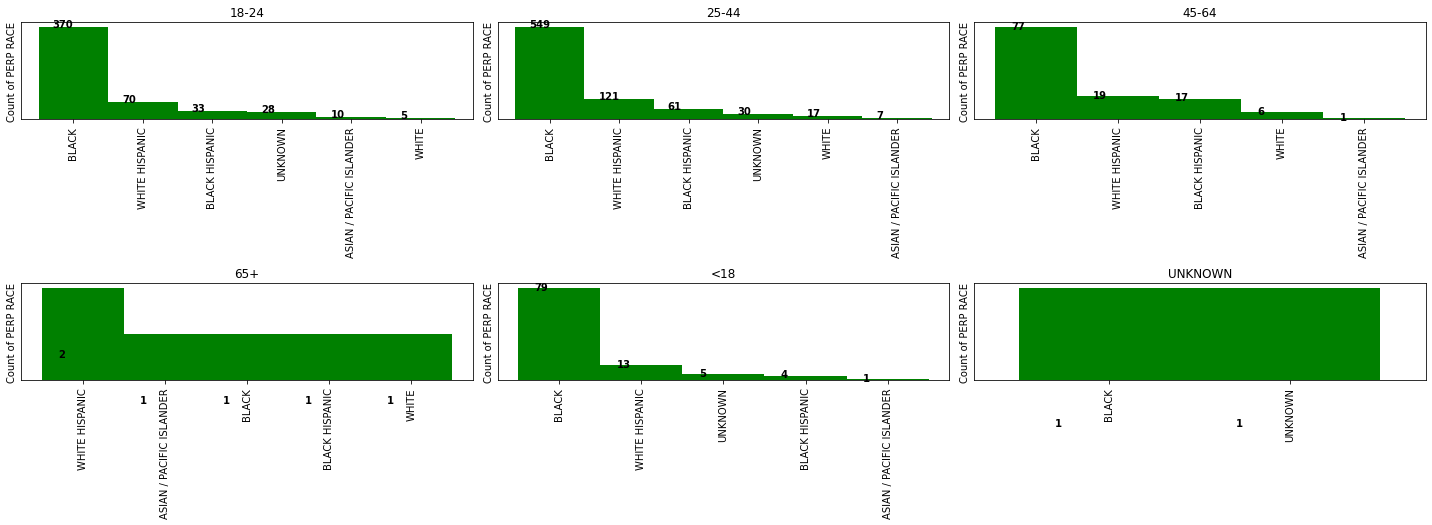

In [ ]:
age_group = shootings.groupby('PERP_AGE_GROUP')['PERP_RACE'].value_counts()
groups = age_group.groupby('PERP_AGE_GROUP')
fig = plt.figure()
count = 1

for year, group in groups:

    ax = fig.add_subplot(6,3,count) 
    ax.set_title(year)
    ax = group[year].plot.bar(figsize = (20,20), width = 1,color='green')
    
    count+=1;
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Count of PERP RACE')
    
   
    total_of_year = []
    for i in ax.patches:
        total_of_year.append(i.get_height())
    total = sum(total_of_year)
    for i in ax.patches:
        ax.text(round(i.get_x()+0.2,1),round(i.get_height()-1.5,1),s= round(i.get_height(),1),color="black",fontweight='bold') #adding data labels (total value of spendings ) to the bars
plt.tight_layout()
plt.show()


In [ ]:
victim_df = pd.pivot_table(shootings_age_clean, values = 'INCIDENT_KEY', index = 'VIC_AGE_GROUP', 
               columns = 'VIC_SEX', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
victim_df

AttributeError: ignored

VIC_SEX            F       M    U   All
VIC_AGE_GROUP                          
<18              6.0    87.0  2.0    95
18-24           45.0   404.0  1.0   450
25-44           54.0   790.0  3.0   847
45-64           24.0   100.0  NaN   124
65+              4.0     5.0  NaN     9
UNKNOWN          NaN     5.0  1.0     6
All            133.0  1391.0  7.0  1531

In [ ]:
profile_df2 = pd.pivot_table(shootings_age_clean, values = 'INCIDENT_KEY', index = 'VIC_AGE_GROUP', 
               columns = 'VIC_RACE', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
profile_df2

AttributeError: ignored

VIC_RACE       ASIAN / PACIFIC ISLANDER   BLACK  BLACK HISPANIC  UNKNOWN  \
VIC_AGE_GROUP                                                              
<18                                 1.0    73.0            10.0      NaN   
18-24                               7.0   321.0            35.0      3.0   
25-44                              16.0   635.0            65.0      1.0   
45-64                               2.0    83.0             9.0      NaN   
65+                                 2.0     4.0             NaN      NaN   
UNKNOWN                             1.0     1.0             NaN      2.0   
All                                29.0  1117.0           119.0      6.0   

VIC_RACE       WHITE  WHITE HISPANIC   All  
VIC_AGE_GROUP                               
<18              NaN            11.0    95  
18-24           12.0            72.0   450  
25-44           13.0           117.0   847  
45-64            6.0            24.0   124  
65+              NaN             3.0     9  


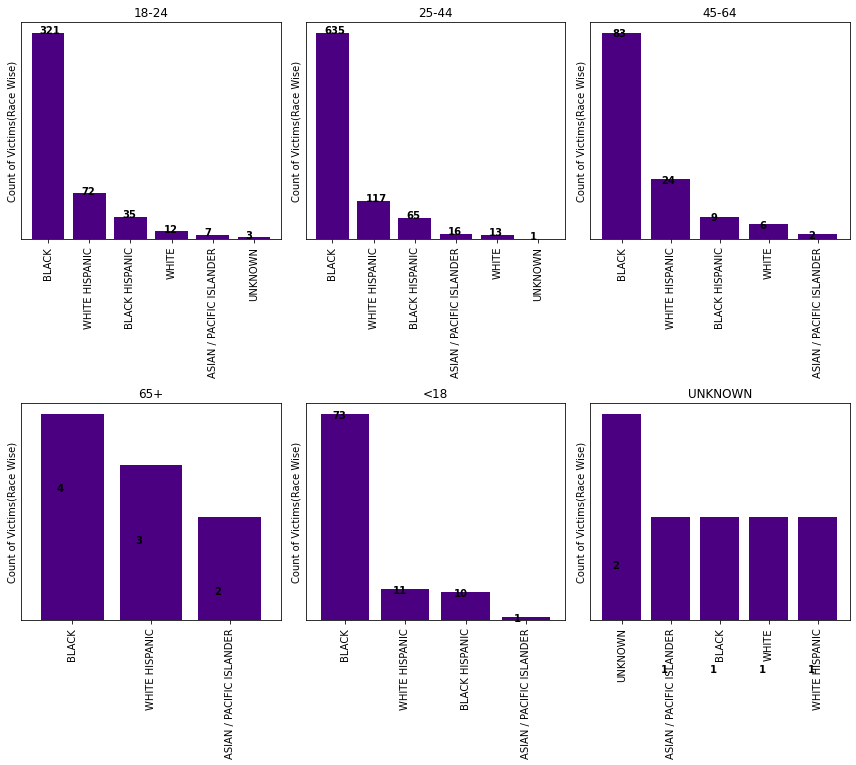

In [ ]:
vic_age = shootings.groupby('VIC_AGE_GROUP')['VIC_RACE'].value_counts()
groups = vic_age.groupby('VIC_AGE_GROUP')
fig = plt.figure()
count = 1
#Creating a for loop to plot different bar plots age wise.
for year, group in groups:
    #Creating subplots to show the output.
    ax = fig.add_subplot(6,3,count)
    ax.set_title(year)
    ax = group[year].plot.bar(figsize = (12,30), width = 0.8,color='indigo')#creating bar plots
    
    count+=1;
    #Defining labels for the axis peresnt in the graph.
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Count of Victims(Race Wise)')
    
    
    total_of_year = []
    for i in ax.patches:
        total_of_year.append(i.get_height())
    total = sum(total_of_year)
    for i in ax.patches:
        ax.text(round(i.get_x()+0.2,1),round(i.get_height()-1.5,1),s= round(i.get_height(),1),color="black",fontweight='bold') #adding data labels (total value of spendings ) to the bars
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

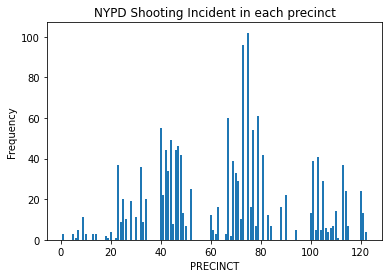

In [ ]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))


fig, ax = plt.subplots() 

data = shootings['PRECINCT'].value_counts() 

points = data.index 
frequency = data.values 

ax.bar(points, frequency) 


ax.set_title('NYPD Shooting Incident in each precinct') 
ax.set_xlabel('PRECINCT') 
ax.set_ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



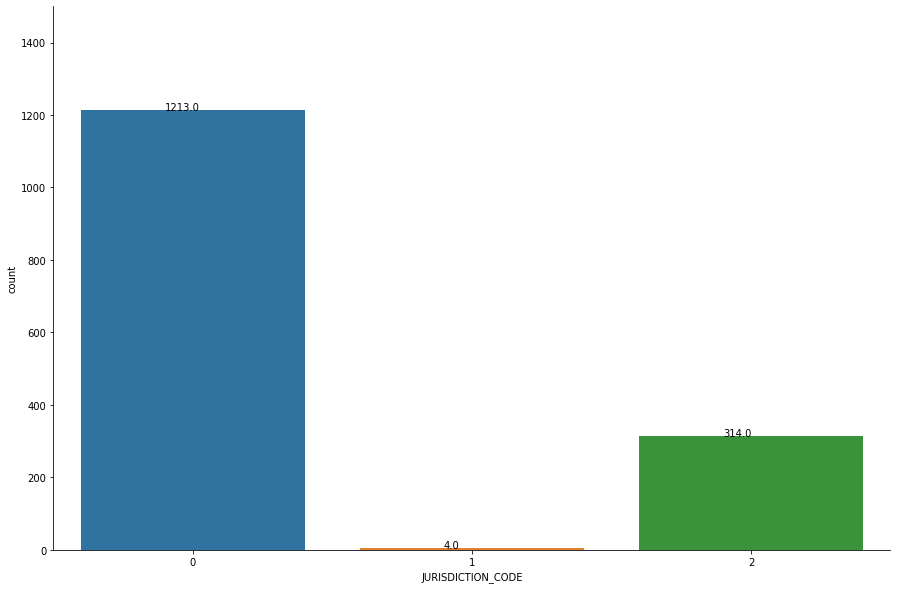

In [ ]:
plt.figure(figsize=(15,10))
plt.ylim(0,1500,1500)
#Creating a countplot for 'JURISDICTION_CODE'. To show the count of distinct values present in the column.
ax = sns.countplot('JURISDICTION_CODE',data=shootings)
annot_plot(ax,0.3,1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



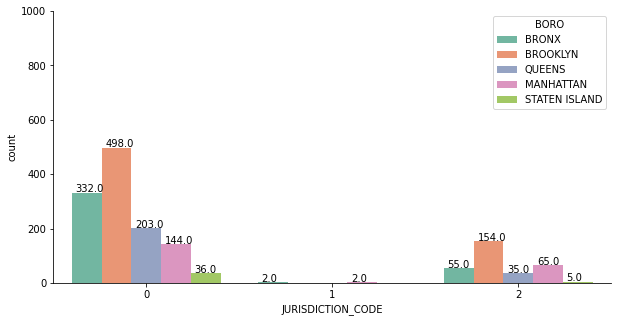

In [ ]:
#Setting the figure size and limits.
plt.figure(figsize=(10,5))
plt.ylim(0,1000,1000)
#Creating a countplot for 'JURISDICTION_CODE' by area. To show the count of distinct values present in the column area wise.
ax = sns.countplot('JURISDICTION_CODE',hue='BORO', data=shootings, palette='Set2')
annot_plot(ax,0.02,1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



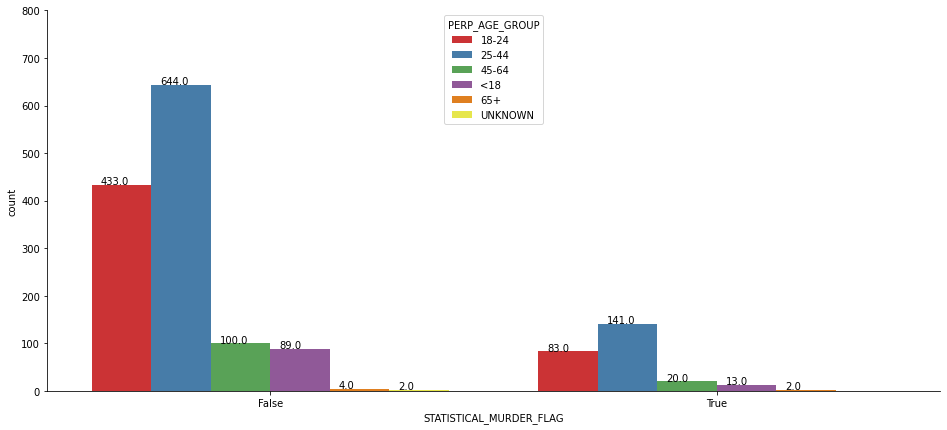

In [ ]:
plt.figure(figsize=(16,7))
plt.ylim(0,800,500)

ax = sns.countplot('STATISTICAL_MURDER_FLAG', hue='PERP_AGE_GROUP', data=shootings, palette='Set1')

annot_plot(ax, 0.02, 1)
plt.show()